# Creating My Diamonds Dataset for analysis

In [1]:
import numpy as np
import pandas as pd
import re

### Import ggplot diamonds dataset and clean up data

- In ggplot, diamonds categorized between "Ideal" and "Very Good" cut ratings were labeled as "Premium," which the market labels as "Excellent." I used string-replace to align these values to the lab-created diamond datasets.
<br></br><br></br>
- Added columns for "Type" and "Source" for comparitive analysis vs. lab-created diamonds.

In [2]:
mined = pd.read_csv('mined_diamonds.csv')

mined = mined[['carat', 'cut', 'color', 'clarity', 'price']]
mined['cut'] = mined['cut'].str.replace('Premium', 'Excellent')
mined['type'] = 'mined'
mined['source'] = 'ggplot'

### Import lab-created diamond datasets and clean up data

Clean Origin dataset

In [3]:
cleanorigin = pd.read_csv('cleanorigin_diamonds.csv', header = None)
cleanorigin.columns = ['carat', 'color', 'clarity', 'cut', 'price']
cleanorigin['price'] = cleanorigin['price'].str.replace('[$,]', '').astype(float)
cleanorigin['type'] = 'lab'
cleanorigin['source'] = 'clean origin'
cleanorigin = cleanorigin[['carat', 'cut', 'color', 'clarity', 'price', 'type', 'source']]

In [391]:
cleanorigin.head()

,carat,cut,color,clarity,price,type,source
0,0.30,Very Good,J,SI1,199.0,lab,clean origin
1,0.30,Ideal,K,VS1,201.0,lab,clean origin
2,0.30,Excellent,K,VS1,201.0,lab,clean origin
3,0.30,Ideal,H,SI2,210.0,lab,clean origin
4,0.32,Ideal,K,VS1,214.0,lab,clean origin


MiaDonna dataset

In [4]:
miadonna = pd.read_csv('miadonna_diamonds.csv', header = None)
miadonna.columns = ['carat', 'color', 'clarity', 'cut', 'price']
miadonna['price'] = miadonna['price'].str.replace('[$,(USD)]', '').astype(float)
miadonna['cut'] = miadonna['cut'].str.title()
miadonna['type'] = 'lab'
miadonna['source'] = 'miadonna'
miadonna = miadonna[['carat', 'cut', 'color', 'clarity', 'price', 'type', 'source']]

In [393]:
miadonna.head()

,carat,cut,color,clarity,price,type,source
0,1.0,Very Good,K,I1,1265.0,lab,miadonna
1,1.0,Ideal,K,VS2,1348.0,lab,miadonna
2,1.0,Ideal,K,VS2,1367.0,lab,miadonna
3,1.0,Ideal,K,VS1,1408.0,lab,miadonna
4,1.0,Excellent,J,SI1,1470.0,lab,miadonna


### Create new dataset with data from previous 3 datasets

- Replaced "None" values with np.nan 

In [5]:
diamonds = pd.concat([mined, cleanorigin, miadonna], ignore_index = True)
diamonds.replace('None', np.nan, inplace = True)

In [342]:
diamonds.to_csv('all_diamonds.csv', index = False)

Assessing distribution of data among characteristics

In [386]:
diamonds.groupby(['type'])['color'].value_counts(normalize = True)

type   color
lab    G        0.212256
       I        0.199427
       H        0.184372
       F        0.159775
       E        0.101569
       J        0.080683
       D        0.035941
       K        0.025975
mined  G        0.209344
       E        0.181628
       F        0.176900
       H        0.153949
       D        0.125603
       I        0.100519
       J        0.052058
Name: color, dtype: float64

In [113]:
diamonds.groupby(['type'])['cut'].value_counts(normalize = True)

type   cut      
lab    Ideal        0.494606
       Excellent    0.428257
       Very Good    0.075861
       Good         0.001160
       Fair         0.000116
mined  Ideal        0.353210
       Excellent    0.268594
       Very Good    0.235362
       Good         0.101992
       Fair         0.040841
Name: cut, dtype: float64

In [380]:
diamonds.groupby(['type'])['clarity'].value_counts(normalize = True)

type   clarity
lab    VS1        0.335030
       VS2        0.267812
       VVS2       0.160729
       SI1        0.121819
       SI2        0.056616
       VVS1       0.047392
       I1         0.010390
       IF         0.000212
mined  SI1        0.242214
       VS2        0.227253
       SI2        0.170449
       VS1        0.151483
       VVS2       0.093919
       VVS1       0.067760
       IF         0.033185
       I1         0.013737
Name: clarity, dtype: float64

# Graphing

In [16]:
import seaborn as sns
from scipy import stats

### Setting order within categories

In [7]:
diamonds['cut'] = diamonds['cut'].astype('category')
diamonds['cut'].cat.reorder_categories(['Ideal', 'Excellent', 'Very Good', 'Good', 'Fair'], inplace = True)

In [8]:
diamonds['color'] = diamonds['color'].astype('category')
diamonds['color'].cat.reorder_categories(['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'], inplace = True)

In [9]:
diamonds['clarity'] = diamonds['clarity'].astype('category')
diamonds['clarity'].cat.reorder_categories(['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'], inplace = True)

### Histogram showed high amount of mined diamonds under 0.5 carats

C:\Users\David\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


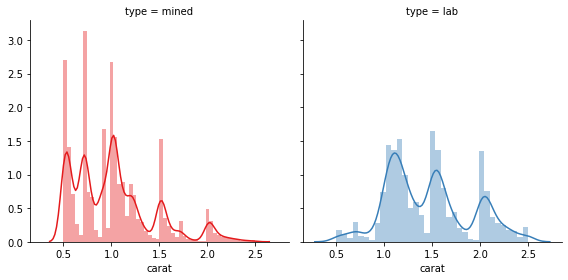

In [84]:
sns.FacetGrid(diamonds, col = 'type', hue = 'type', palette = "Set1", size = 4).map(sns.distplot, "carat")

With engagement diamonds in mind, I wanted to analyze diamonds between 0.5 and 2.5 carats.

In [11]:
diamonds = diamonds[diamonds['carat'] >= 0.5]
diamonds = diamonds[diamonds['carat'] <= 2.5]

### Create a 'Price per Carat' column as 'ppc'

Using Pearson's correlation, I was able to show strong correlation between carat size and price. From these variables, I created a new 'Price per Carat' column as 'ppc'

In [17]:
print('mined:', stats.pearsonr(diamonds[diamonds['type'] == 'mined']['price'], diamonds[diamonds['type'] == 'mined']['carat']))
print('lab:', stats.pearsonr(diamonds[diamonds['type'] == 'lab']['price'], diamonds[diamonds['type'] == 'lab']['carat']))

mined: (0.8975048105599401, 0.0)
lab: (0.8266627159014796, 0.0)


In [19]:
diamonds['ppc'] = round(diamonds['price'] / diamonds['carat'], 2)

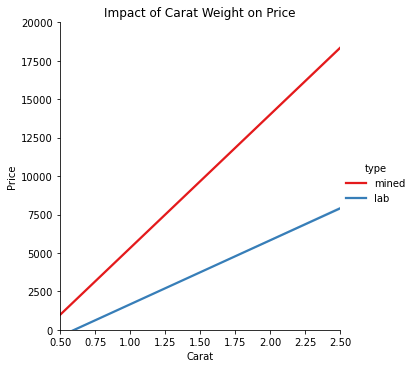

In [83]:
sns.lmplot('carat', 'price', diamonds, hue = 'type', palette = 'Set1', scatter = False).set(ylim=(0, 20000), xlabel = 'Carat', ylabel = 'Price', title = 'Impact of Carat Weight on Price')

In [111]:
diamonds.groupby('type')[['ppc']].median()

,ppc
type,
lab,2161.540
mined,4368.015


In [86]:
diamonds.groupby('type')['ppc'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
lab,8729.0,2301.366993,817.036466,698.57,1766.6700,2161.540,2653.9500,9381.68
mined,36140.0,4843.882384,1933.132403,1168.00,3447.9725,4368.015,5880.1425,17828.85


[Text(0, 0.5, 'Price-per-Carat'),
 Text(0.5, 0, 'Type'),
 Text(0.5, 1.0, 'Price-per-Carat by Diamond Type')]

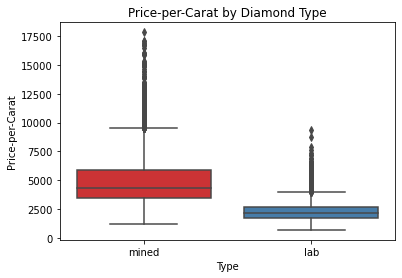

In [81]:
sns.boxplot(x = 'type', y = 'ppc', data = diamonds, palette = 'Set1').set(xlabel = 'Type', ylabel = 'Price-per-Carat', title = 'Price-per-Carat by Diamond Type')

### Graphing difference in price as well as price-per-carat across different characteristics

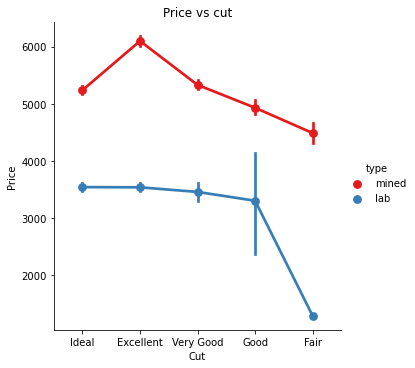

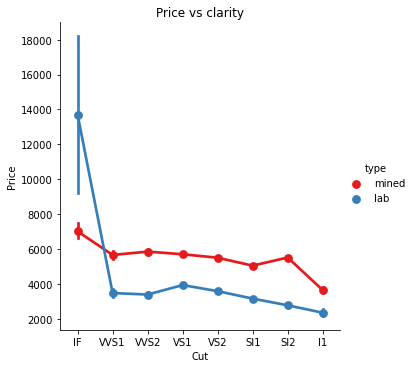

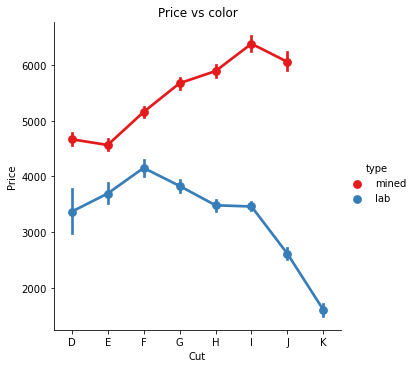

In [87]:
for i in ['cut', 'clarity' ,'color']:
    sns.catplot(data = diamonds, kind = 'point', x = i, y = 'price', hue = 'type', palette = 'Set1').set(xlabel='Cut', ylabel='Price', title = f'Price vs {i}')

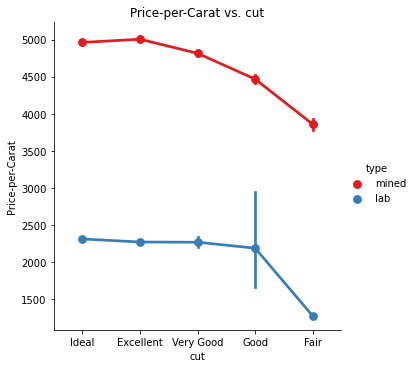

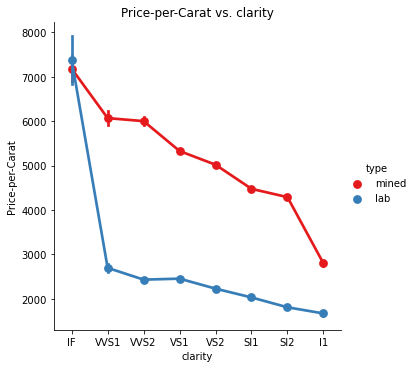

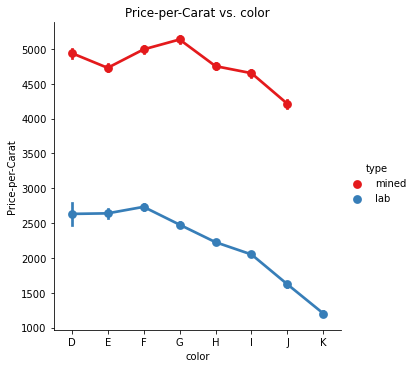

In [89]:
for i in ['cut', 'clarity' ,'color']:
    sns.catplot(data = diamonds, kind = 'point', x = i, y = 'ppc', hue = 'type', palette = 'Set1').set(ylabel='Price-per-Carat', title = f'Price-per-Carat vs. {i}')
